In [1]:
# Import all the necessary packages and libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Read the '.csv' file
data = pd.read_csv('Subjects 2017-18.csv') 

# View the head of the df
data.head() 

,Subject Area,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,(1) Medicine & dentistry,All,All,Full-time,England,Female,2017/18,25825
1,(1) Medicine & dentistry,All,All,Full-time,England,Male,2017/18,19015
2,(1) Medicine & dentistry,All,All,Full-time,England,Other,2017/18,45
3,(1) Medicine & dentistry,All,All,Full-time,England,Total,2017/18,44885
4,(1) Medicine & dentistry,All,All,Full-time,Northern Ireland,Female,2017/18,1195


In [3]:
# More info about the DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25720 entries, 0 to 25719
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Subject Area            25720 non-null  object
 1   First year marker       25720 non-null  object
 2   Level of study          25720 non-null  object
 3   Mode of study           25720 non-null  object
 4   Country of HE provider  25720 non-null  object
 5   Sex                     25720 non-null  object
 6   Academic Year           25720 non-null  object
 7   Number                  25720 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [4]:
# Prints descriptive statistics
data.describe()  

,Number
count,2.572000e+04
mean,1.301832e+04
std,6.861436e+04
min,0.000000e+00
25%,1.500000e+01
50%,3.400000e+02
75%,3.331250e+03
max,2.343095e+06


In [5]:
# Check for missing data
data.isnull().sum()

Subject Area              0
First year marker         0
Level of study            0
Mode of study             0
Country of HE provider    0
Sex                       0
Academic Year             0
Number                    0
dtype: int64

In [94]:
# Check for NaN
datana = data[(data["Number"]=="NaN")]

In [95]:
# Print df with check for NaN
datana

,Subject Area,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number


In [6]:
# Looked at all of data, just data.head(100) left here to decrease file size
data.head(100)

,Subject Area,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,(1) Medicine & dentistry,All,All,Full-time,England,Female,2017/18,25825
1,(1) Medicine & dentistry,All,All,Full-time,England,Male,2017/18,19015
2,(1) Medicine & dentistry,All,All,Full-time,England,Other,2017/18,45
3,(1) Medicine & dentistry,All,All,Full-time,England,Total,2017/18,44885
4,(1) Medicine & dentistry,All,All,Full-time,Northern Ireland,Female,2017/18,1195
...,...,...,...,...,...,...,...,...
95,(1) Medicine & dentistry,Other years,All,Part-time,Wales,Total,2017/18,400
96,(1) Medicine & dentistry,All,All,All,England,Female,2017/18,30325
97,(1) Medicine & dentistry,All,All,All,England,Male,2017/18,22500
98,(1) Medicine & dentistry,All,All,All,England,Other,2017/18,60


In [7]:
# Check the distribution of the df
# Minimum values of the df
data.min()

Subject Area              (1) Medicine & dentistry
First year marker                              All
Level of study                                 All
Mode of study                                  All
Country of HE provider                         All
Sex                                         Female
Academic Year                              2017/18
Number                                           0
dtype: object

In [8]:
# Maximum values of the df
data.max()

Subject Area              Total - Science subject areas
First year marker                           Other years
Level of study                    Postgraduate (taught)
Mode of study                                 Part-time
Country of HE provider                            Wales
Sex                                               Total
Academic Year                                   2017/18
Number                                          2343095
dtype: object

In [9]:
# Check for number of variables in each column
data.nunique()

Subject Area                21
First year marker            3
Level of study               7
Mode of study                3
Country of HE provider       5
Sex                          4
Academic Year                1
Number                    5066
dtype: int64

In [10]:
# Pandas drop a column with drop function
data1 = data.drop(['Academic Year'], axis=1)

In [11]:
# Rename columns
data1.columns = ['Area', 'Year', 'Level', 'Mode', 'Country', 'Sex', 'Number']

In [12]:
# Check df
data1.head()

,Area,Year,Level,Mode,Country,Sex,Number
0,(1) Medicine & dentistry,All,All,Full-time,England,Female,25825
1,(1) Medicine & dentistry,All,All,Full-time,England,Male,19015
2,(1) Medicine & dentistry,All,All,Full-time,England,Other,45
3,(1) Medicine & dentistry,All,All,Full-time,England,Total,44885
4,(1) Medicine & dentistry,All,All,Full-time,Northern Ireland,Female,1195


In [13]:
# Pivot the df
subjects = ['Area', 'Year', 'Level', 'Mode','Country']

new_df = data1.set_index(['Sex'] + subjects).unstack('Sex')
new_df.head(10)

Number         \
Sex                                                            Female   Male   
Area                     Year Level Mode      Country                          
(1) Medicine & dentistry All  All   All       All               38340  27475   
                                              England           30325  22500   
                                              Northern Ireland   1350    805   
                                              Scotland           4635   3020   
                                              Wales              2030   1145   
                                    Full-time All               32725  23235   
                                              England           25825  19015   
                                              Northern Ireland   1195    685   
                                              Scotland           4100   2630   
                                              Wales              1600    900   

                                                                             
Sex                                                            Other  Total  
Area                     Year Level Mode      Country                        
(1) Medicine & dentistry All  All   All       All                 65  65875  
                                              England             60  52885  
                                              Northern Ireland     0   2160  
                                              Scotland             0   7655  
                                              Wales                0   3180  
                                    Full-time All                 45  56005  
                                              England             45  44885  
                                              Northern Ireland     0   1880  
                                              Scotland             0   6730  
                                              Wales                0   2505

In [14]:
# Reset index
df1 = new_df.Number.rename_axis([None], axis=1).reset_index()

In [15]:
# Check new df
df1.head()

,Area,Year,Level,Mode,Country,Female,Male,Other,Total
0,(1) Medicine & dentistry,All,All,All,All,38340,27475,65,65875
1,(1) Medicine & dentistry,All,All,All,England,30325,22500,60,52885
2,(1) Medicine & dentistry,All,All,All,Northern Ireland,1350,805,0,2160
3,(1) Medicine & dentistry,All,All,All,Scotland,4635,3020,0,7655
4,(1) Medicine & dentistry,All,All,All,Wales,2030,1145,0,3180


In [16]:
# Create new columns of percentages for number by sex
df1['Female %'] = (df1['Female']/df1['Total']*100).round(2)
df1['Male %'] = (df1['Male']/df1['Total']*100).round(2)
df1['Other %'] = (df1['Other']/df1['Total']*100).round(2)

In [17]:
# Check new df
df1.head(3)

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
0,(1) Medicine & dentistry,All,All,All,All,38340,27475,65,65875,58.20,41.71,0.10
1,(1) Medicine & dentistry,All,All,All,England,30325,22500,60,52885,57.34,42.55,0.11
2,(1) Medicine & dentistry,All,All,All,Northern Ireland,1350,805,0,2160,62.50,37.27,0.00


In [18]:
# Create new df with just first year students
first_year = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [19]:
# Check df
first_year

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
104,(1) Medicine & dentistry,First year,All,All,All,12070,7585,40,19695,61.28,38.51,0.20
413,(2) Subjects allied to medicine,First year,All,All,All,108115,27925,130,136175,79.39,20.51,0.10
728,(3) Biological sciences,First year,All,All,All,60300,33070,135,93505,64.49,35.37,0.14
998,(4) Veterinary science,First year,All,All,All,1675,505,0,2180,76.83,23.17,0.00
1222,(5) Agriculture & related subjects,First year,All,All,All,5785,3730,5,9525,60.73,39.16,0.05
1535,(6) Physical sciences,First year,All,All,All,15405,18920,30,34355,44.84,55.07,0.09
1850,(7) Mathematical sciences,First year,All,All,All,6265,10445,15,16725,37.46,62.45,0.09
2163,(8) Computer science,First year,All,All,All,8400,35945,30,44370,18.93,81.01,0.07
2477,(9) Engineering & technology,First year,All,All,All,12720,51655,25,64395,19.75,80.22,0.04
2792,(B) Social studies,First year,All,All,All,64940,36080,125,101145,64.20,35.67,0.12


In [20]:
# Filter df again
subset = first_year.iloc[:, [0,9,10,11]]

In [21]:
# Reorder rows
year1 = subset.sort_values(by='Female %')

In [22]:
# Check new df
year1

,Area,Female %,Male %,Other %
2163,(8) Computer science,18.93,81.01,0.07
2477,(9) Engineering & technology,19.75,80.22,0.04
1850,(7) Mathematical sciences,37.46,62.45,0.09
1535,(6) Physical sciences,44.84,55.07,0.09
3422,(D) Business & administrative studies,50.83,49.13,0.03
6220,Total - Science subject areas,54.03,45.88,0.09
4358,(G) Historical & philosophical studies,54.94,44.75,0.32
5590,Total,58.33,41.57,0.10
3734,(E) Mass communications & documentation,60.41,39.44,0.15
1222,(5) Agriculture & related subjects,60.73,39.16,0.05


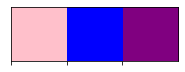

In [23]:
# Set colour palette for seaborn
color = ["pink", "blue", "purple"]
sns.set_palette(color)
sns.palplot(sns.color_palette())

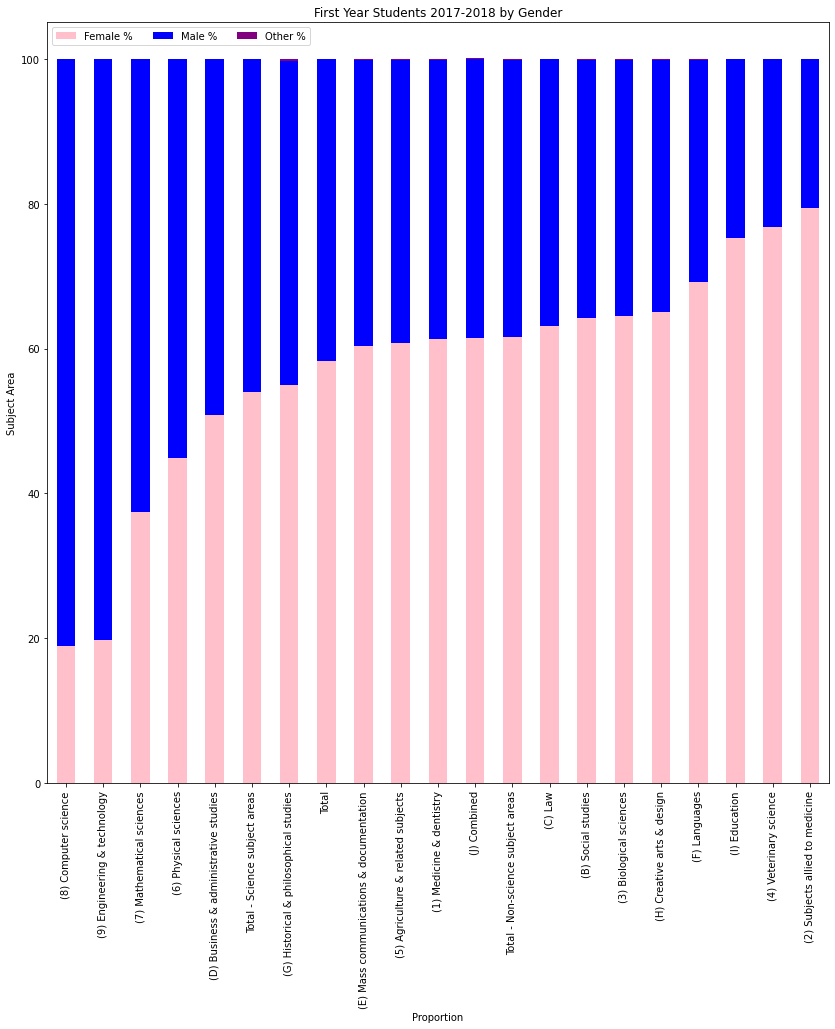

In [24]:
# Plot First Year Percentage by Gender for 2017-2018
year1.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [25]:
# Filter df again
subset2 = first_year.iloc[:, [0,5,6,7]]

In [26]:
# Reorder rows
year2 = subset2.sort_values(by='Female')

In [27]:
# Check new df
year2

,Area,Female,Male,Other
998,(4) Veterinary science,1675,505,0
1222,(5) Agriculture & related subjects,5785,3730,5
1850,(7) Mathematical sciences,6265,10445,15
2163,(8) Computer science,8400,35945,30
5296,(J) Combined,10845,6785,15
104,(1) Medicine & dentistry,12070,7585,40
2477,(9) Engineering & technology,12720,51655,25
3734,(E) Mass communications & documentation,13830,9030,35
1535,(6) Physical sciences,15405,18920,30
4358,(G) Historical & philosophical studies,17250,14050,100


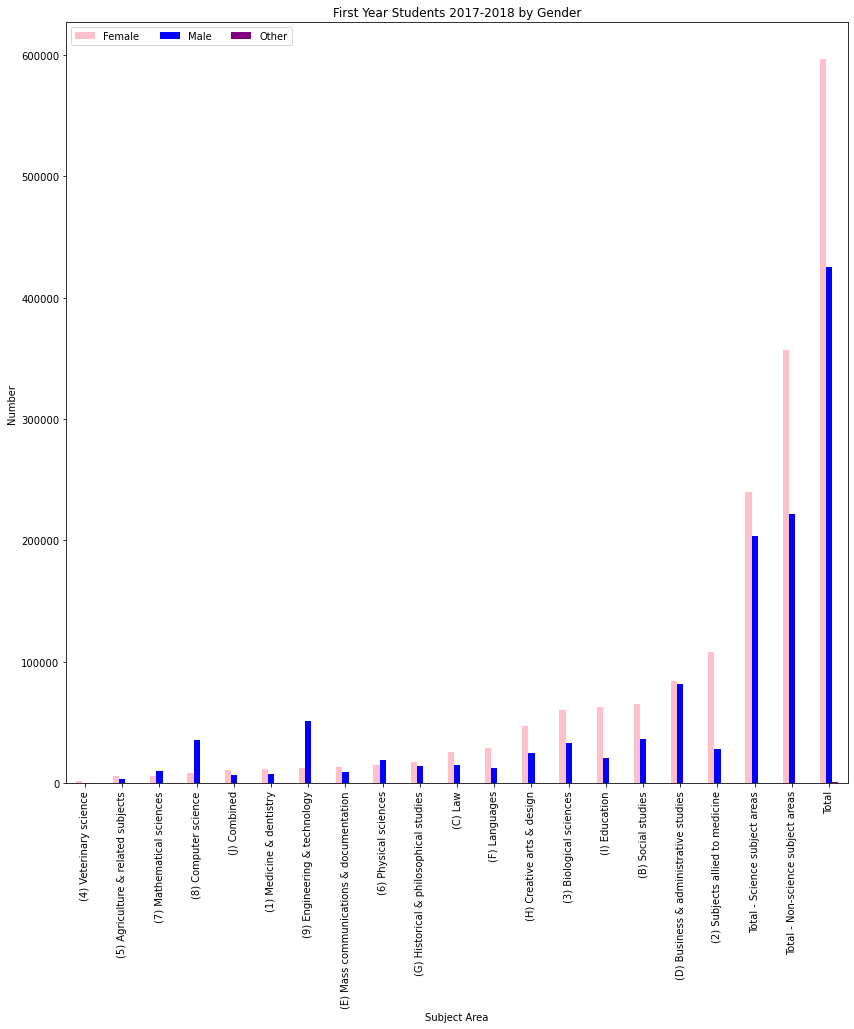

In [28]:
# Plot First Year Number by Gender for 2017-2018
year2.plot(kind='bar', x='Area',
                    stacked=False,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students 2017-2018 by Gender")
plt.xlabel("Subject Area")
plt.xticks(rotation = 90)
plt.ylabel("Number")
plt.show()

In [29]:
# Create new df with all student years
all_years = df1[(df1["Year"]=="All")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [30]:
# Filter df again
subset = all_years.iloc[:, [0,9,10,11]]

In [31]:
# Reorder rows
allyears = subset.sort_values(by='Female %')

In [32]:
# Check new df
allyears

,Area,Female %,Male %,Other %
2058,(8) Computer science,17.60,82.34,0.06
2372,(9) Engineering & technology,18.21,81.75,0.03
1745,(7) Mathematical sciences,36.93,62.99,0.08
1430,(6) Physical sciences,42.46,57.47,0.07
3317,(D) Business & administrative studies,49.64,50.34,0.02
6115,Total - Science subject areas,51.87,48.07,0.06
4253,(G) Historical & philosophical studies,54.75,45.07,0.18
5485,Total,56.92,43.01,0.07
0,(1) Medicine & dentistry,58.20,41.71,0.10
3632,(E) Mass communications & documentation,59.11,40.76,0.13


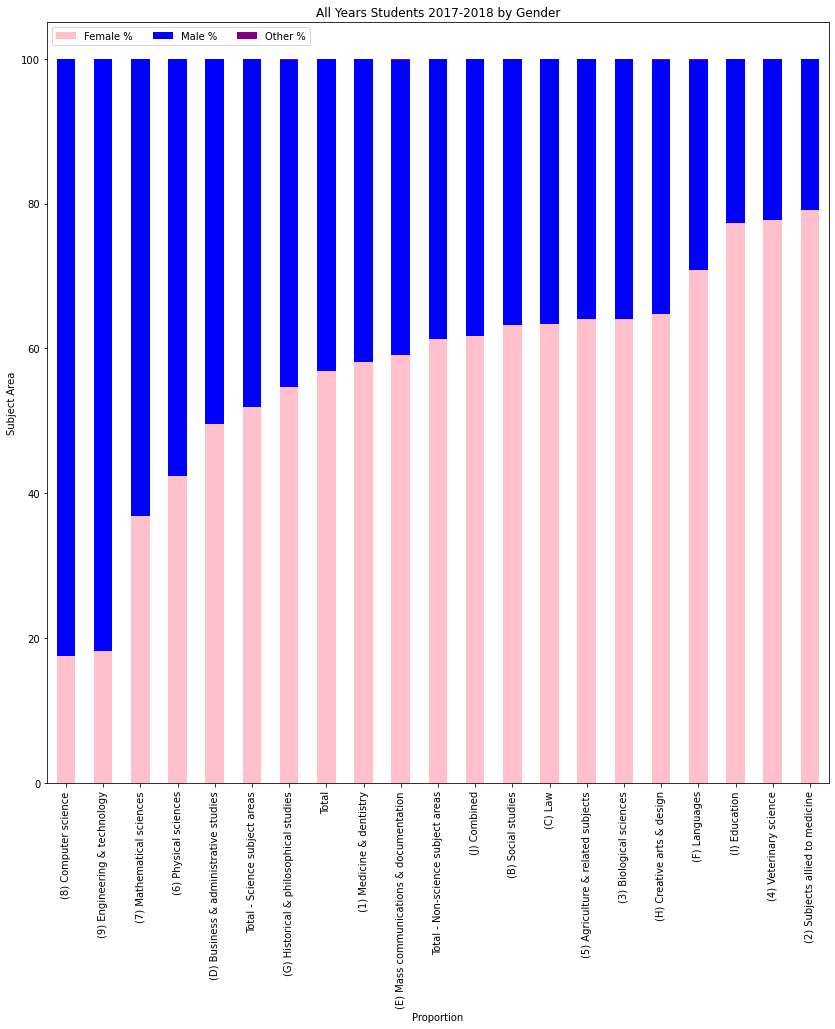

In [33]:
# Plot First Year Percentage by Gender for 2017-2018
allyears.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("All Years Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [34]:
# Create new df with first year students, undergraduates
undergrad = df1[(df1["Year"]=="First year")&(df1["Level"]=="All undergraduate")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [35]:
# Filter df again
subset = undergrad.iloc[:, [0,9,10,11]]

In [36]:
# Reorder rows
first_undergrad = subset.sort_values(by='Female %')

In [37]:
# Check new df
first_undergrad

,Area,Female %,Male %,Other %
2193,(8) Computer science,15.37,84.60,0.05
2507,(9) Engineering & technology,16.05,83.90,0.05
1880,(7) Mathematical sciences,37.61,62.31,0.08
1565,(6) Physical sciences,44.50,55.44,0.04
3452,(D) Business & administrative studies,47.69,52.30,0.01
6250,Total - Science subject areas,53.06,46.87,0.07
3764,(E) Mass communications & documentation,54.98,44.92,0.07
4388,(G) Historical & philosophical studies,55.46,44.25,0.29
5620,Total,57.42,42.51,0.07
1252,(5) Agriculture & related subjects,60.62,39.32,0.07


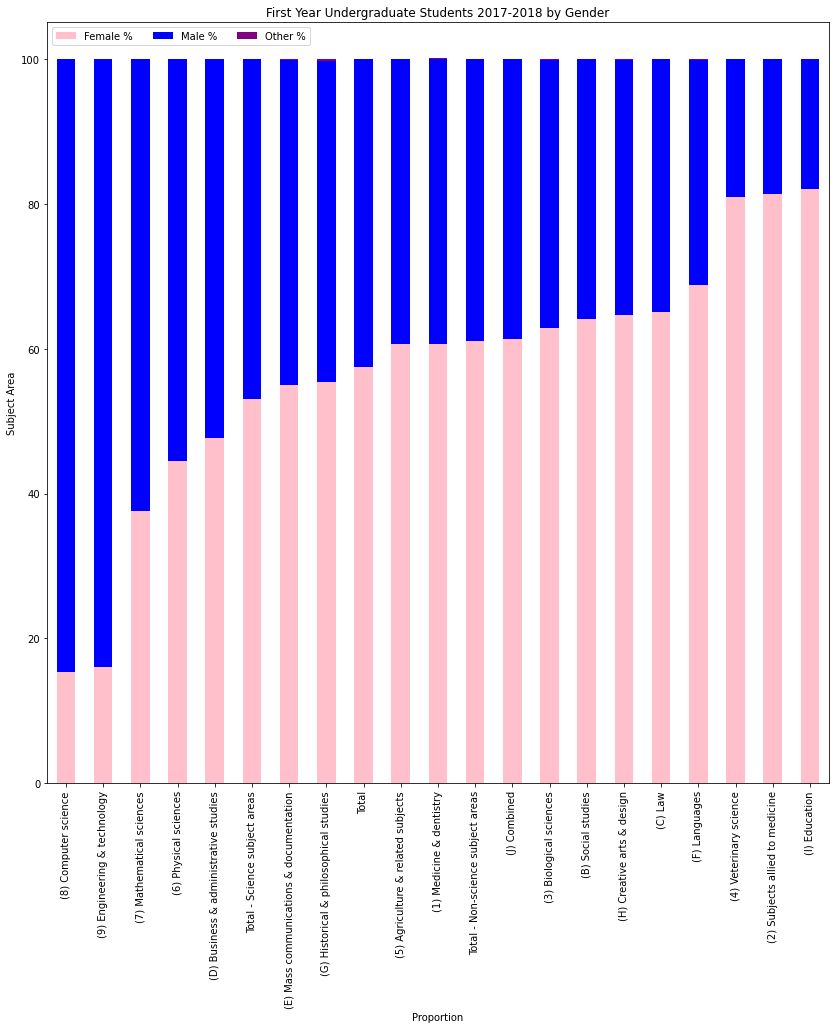

In [38]:
# Plot First Year Percentage by Gender for 2017-2018
first_undergrad.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Undergraduate Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [39]:
# Create new df with first year students, postgraduates
postgrad = df1[(df1["Year"]=="First year")&(df1["Level"]=="All postgraduate")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [40]:
# Filter df again
subset = postgrad.iloc[:, [0,9,10,11]]

In [41]:
# Reorder rows
first_postgrad = subset.sort_values(by='Female %')

In [42]:
# Check new df
first_postgrad

,Area,Female %,Male %,Other %
2492,(9) Engineering & technology,26.93,73.04,0.02
2178,(8) Computer science,28.59,71.29,0.13
1865,(7) Mathematical sciences,36.96,62.80,0.24
1550,(6) Physical sciences,45.55,54.26,0.19
4373,(G) Historical & philosophical studies,53.69,45.93,0.43
3437,(D) Business & administrative studies,54.98,44.96,0.06
6235,Total - Science subject areas,56.10,43.75,0.15
3122,(C) Law,59.58,40.25,0.18
5605,Total,60.02,39.83,0.16
1237,(5) Agriculture & related subjects,61.12,38.65,0.22


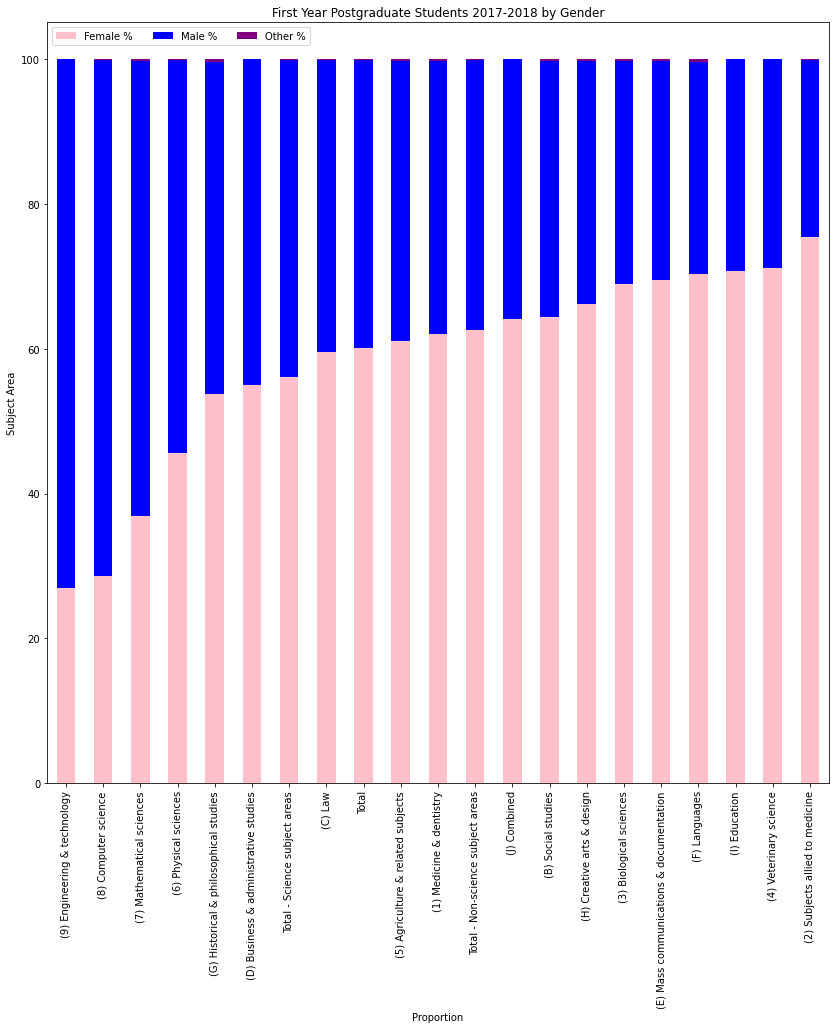

In [43]:
# Plot First Year Percentage by Gender for 2017-2018
first_postgrad.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Postgraduate Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [44]:
# Create new df with first year students, undergrad and postgrad, full time
full = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="Full-time")&(df1["Country"]=="All")]

In [45]:
# Filter df again
subset = full.iloc[:, [0,9,10,11]]

In [46]:
# Reorder rows
first_full = subset.sort_values(by='Female %')

In [47]:
# Check new df
first_full

,Area,Female %,Male %,Other %
2168,(8) Computer science,18.21,81.72,0.07
2482,(9) Engineering & technology,20.74,79.23,0.03
1855,(7) Mathematical sciences,37.10,62.77,0.10
1540,(6) Physical sciences,44.86,55.06,0.08
5301,(J) Combined,48.94,51.06,0.00
6225,Total - Science subject areas,50.36,49.56,0.07
3427,(D) Business & administrative studies,50.98,48.98,0.03
4363,(G) Historical & philosophical studies,54.93,44.89,0.18
5595,Total,56.55,43.37,0.08
3739,(E) Mass communications & documentation,60.16,39.68,0.14


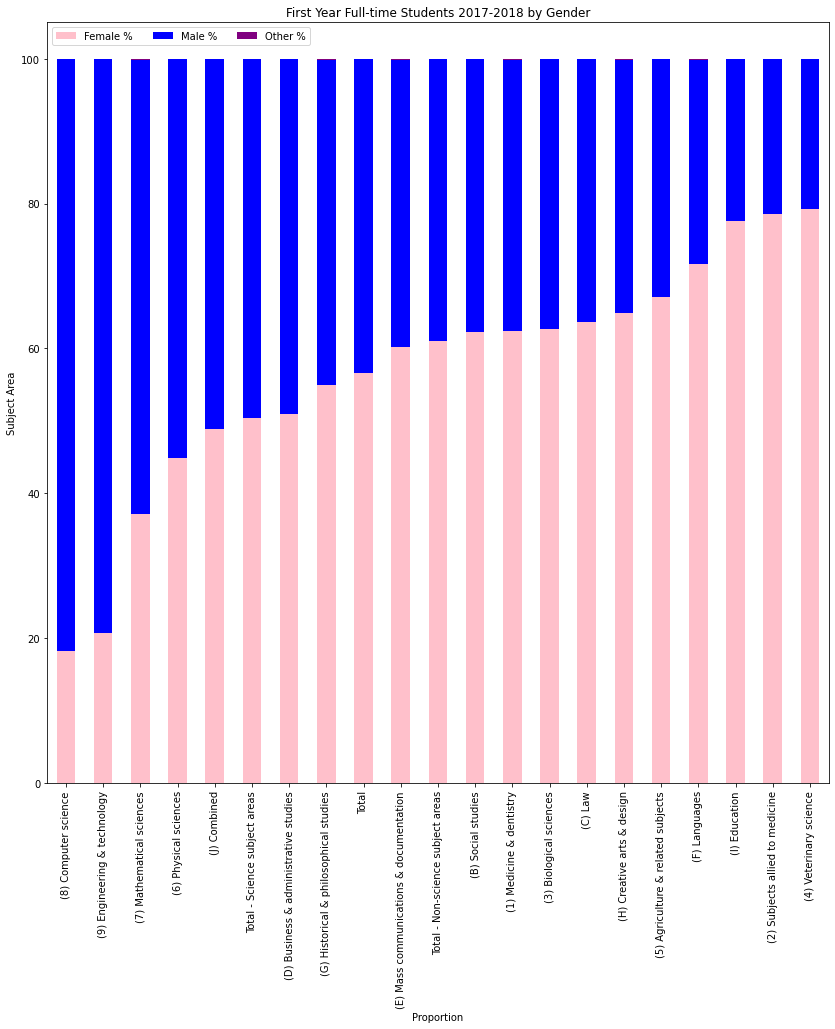

In [48]:
# Plot First Year Percentage of Gender for 2017-2018
first_full.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Full-time Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [49]:
# Create new df with first year students, undergrad and postgrad, part time
part = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="Part-time")&(df1["Country"]=="All")]

In [50]:
# Filter df again
subset = part.iloc[:, [0,9,10,11]]

In [51]:
# Reorder rows
first_part = subset.sort_values(by='Female %')

In [52]:
# Check new df
first_part

,Area,Female %,Male %,Other %
2487,(9) Engineering & technology,14.46,85.44,0.10
2173,(8) Computer science,22.83,77.10,0.07
1860,(7) Mathematical sciences,40.44,59.83,0.00
1545,(6) Physical sciences,44.53,55.47,0.00
1232,(5) Agriculture & related subjects,49.26,50.59,0.00
3432,(D) Business & administrative studies,49.93,50.03,0.04
4368,(G) Historical & philosophical studies,54.95,44.10,1.04
114,(1) Medicine & dentistry,57.36,42.40,0.24
3117,(C) Law,60.40,39.44,0.24
4053,(F) Languages,62.49,36.94,0.58


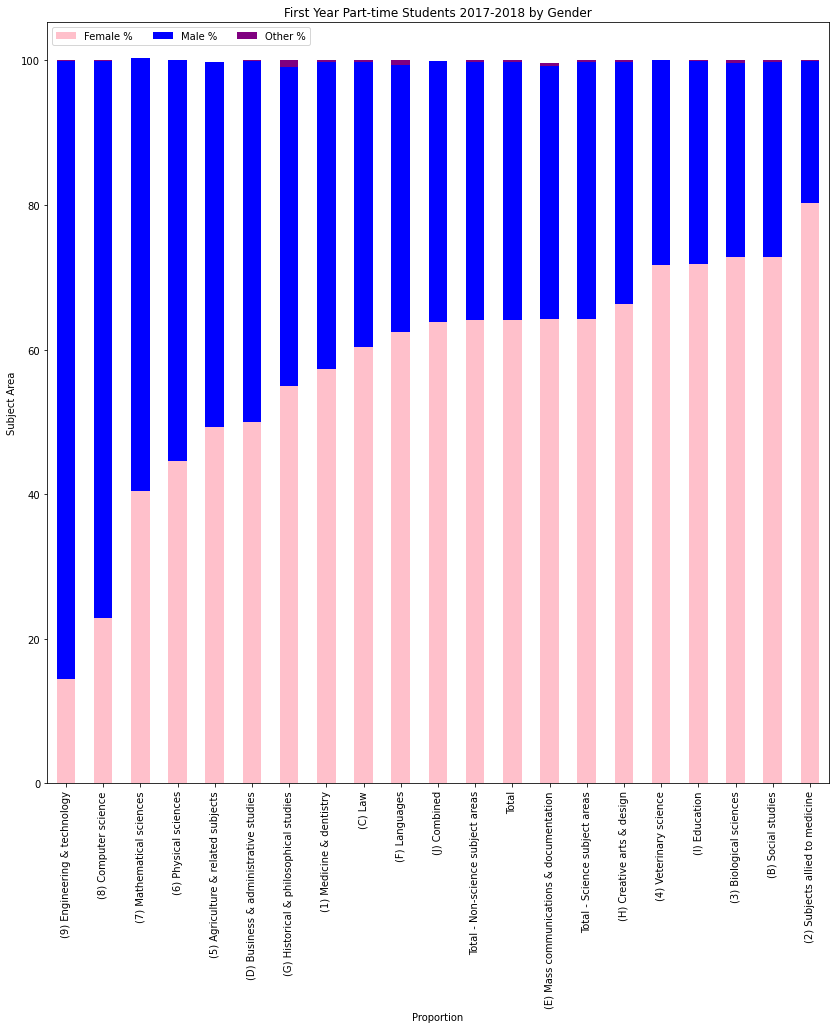

In [53]:
# Plot First Year Percentage of Male, Female, Other for 2017-2018
first_part.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Part-time Students 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [54]:
# Create new df with just first year students for England
eng = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="England")]

In [55]:
# Filter df again
subset = eng.iloc[:, [0,9,10,11]]

In [56]:
# Reorder rows
first_eng = subset.sort_values(by='Female %')

In [57]:
# Check new df
first_eng

,Area,Female %,Male %,Other %
2164,(8) Computer science,18.29,81.66,0.06
2478,(9) Engineering & technology,19.98,79.99,0.02
1851,(7) Mathematical sciences,36.81,63.08,0.11
1536,(6) Physical sciences,44.56,55.37,0.07
3423,(D) Business & administrative studies,50.25,49.71,0.03
6221,Total - Science subject areas,54.03,45.88,0.09
4359,(G) Historical & philosophical studies,54.63,45.19,0.18
5591,Total,58.21,41.70,0.09
3735,(E) Mass communications & documentation,59.94,39.88,0.15
105,(1) Medicine & dentistry,60.74,39.04,0.25


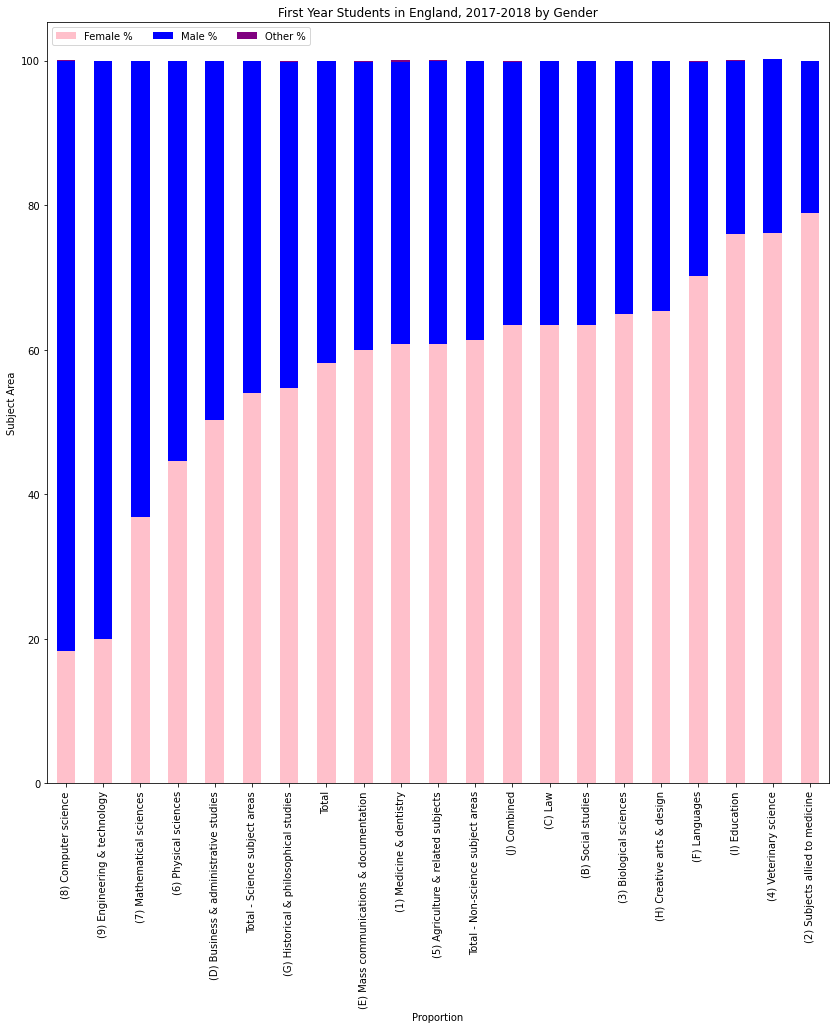

In [58]:
# Plot First Year Percentage of Male, Female, Other for 2017-2018
first_eng.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in England, 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [59]:
# Create new df with just first year students for Scotland
scot = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Scotland")]

In [60]:
# Filter df again
subset = scot.iloc[:, [0,9,10,11]]

In [61]:
# Reorder rows
first_scot = subset.sort_values(by='Female %')

In [62]:
# Check new df
first_scot

,Area,Female %,Male %,Other %
2480,(9) Engineering & technology,20.48,79.46,0.13
2166,(8) Computer science,22.73,77.09,0.19
1853,(7) Mathematical sciences,42.69,57.31,0.00
1538,(6) Physical sciences,47.92,51.96,0.25
6223,Total - Science subject areas,54.91,44.91,0.18
3425,(D) Business & administrative studies,55.90,44.07,0.03
4361,(G) Historical & philosophical studies,58.12,40.73,1.26
1225,(5) Agriculture & related subjects,58.94,40.68,0.00
5593,Total,59.98,39.79,0.23
3110,(C) Law,62.32,37.55,0.13


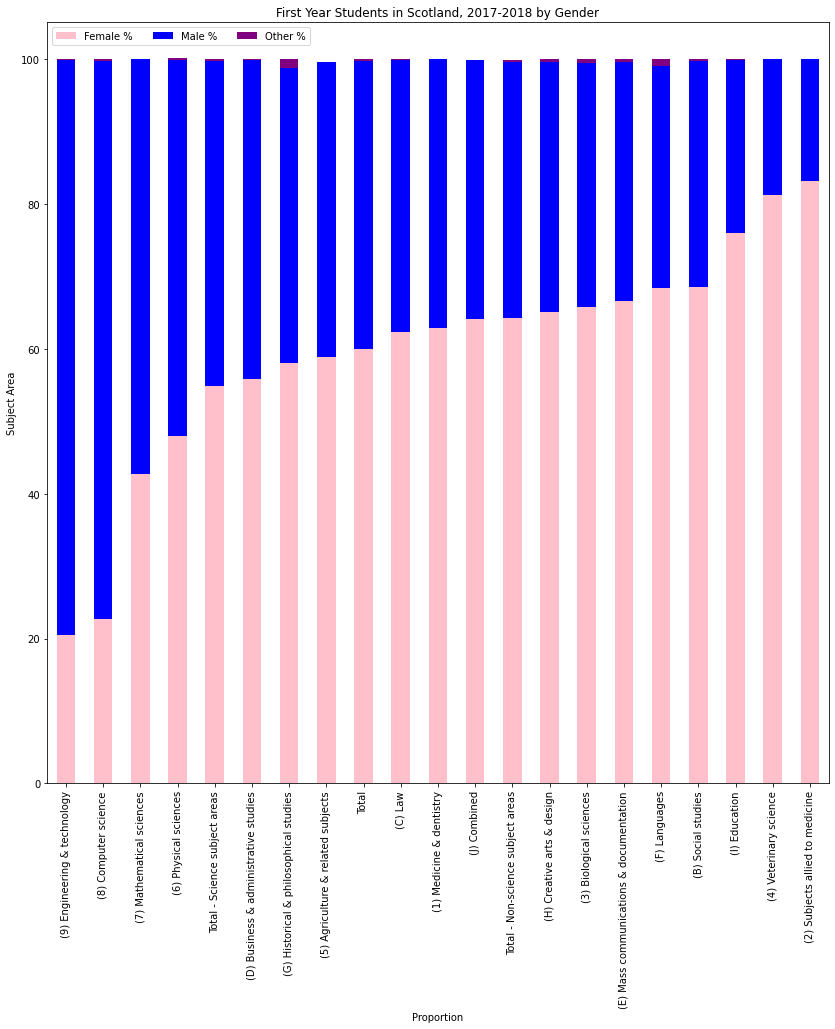

In [63]:
# Plot First Year Percentage of Male, Female, Other for 2017-2018
first_scot.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Scotland, 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [64]:
# Create new df with just first year students for Wales
wales = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Wales")]

In [65]:
# Filter df again
subset = wales.iloc[:, [0,9,10,11]]

In [66]:
# Reorder rows
first_wales = subset.sort_values(by='Female %')

In [67]:
# Check new df
first_wales

,Area,Female %,Male %,Other %
2481,(9) Engineering & technology,14.30,85.70,0.00
2167,(8) Computer science,15.89,83.91,0.00
1854,(7) Mathematical sciences,35.51,64.49,0.00
1539,(6) Physical sciences,42.69,57.31,0.23
3426,(D) Business & administrative studies,50.23,49.71,0.06
6224,Total - Science subject areas,51.11,48.81,0.08
4362,(G) Historical & philosophical studies,51.39,48.61,0.00
5300,(J) Combined,55.94,44.06,0.00
5594,Total,56.36,43.56,0.08
732,(3) Biological sciences,57.25,42.68,0.07


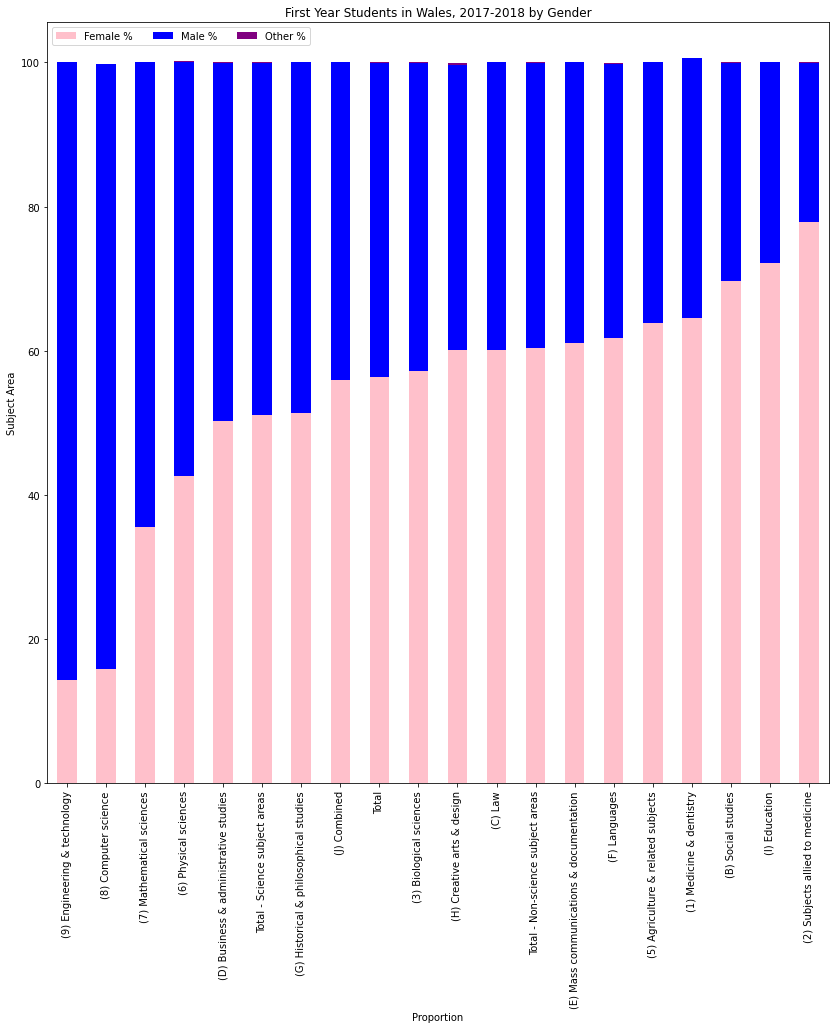

In [68]:
# Plot First Year Percentage of Male, Female, Other for 2017-2018
first_wales.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Wales, 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [69]:
# Create new df with just first year students for Northen Ireland as in the df - there is no numbers for Others
ni = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Northern Ireland")]

In [79]:
# Create new df as in the df - there is no numbers for Others
niall = df1[(df1["Country"]=="Northern Ireland")]

niall.head(50)

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
2,(1) Medicine & dentistry,All,All,All,Northern Ireland,1350,805,0,2160,62.50,37.27,0.0
7,(1) Medicine & dentistry,All,All,Full-time,Northern Ireland,1195,685,0,1880,63.56,36.44,0.0
12,(1) Medicine & dentistry,All,All,Part-time,Northern Ireland,155,120,0,275,56.36,43.64,0.0
17,(1) Medicine & dentistry,All,All postgraduate,All,Northern Ireland,350,215,0,565,61.95,38.05,0.0
22,(1) Medicine & dentistry,All,All postgraduate,Full-time,Northern Ireland,205,110,0,310,66.13,35.48,0.0
27,(1) Medicine & dentistry,All,All postgraduate,Part-time,Northern Ireland,145,110,0,255,56.86,43.14,0.0
32,(1) Medicine & dentistry,All,All undergraduate,All,Northern Ireland,1005,590,0,1595,63.01,36.99,0.0
37,(1) Medicine & dentistry,All,All undergraduate,Full-time,Northern Ireland,995,575,0,1570,63.38,36.62,0.0
42,(1) Medicine & dentistry,All,All undergraduate,Part-time,Northern Ireland,10,15,0,25,40.00,60.00,0.0
47,(1) Medicine & dentistry,All,First degree,All,Northern Ireland,1005,590,0,1595,63.01,36.99,0.0


In [70]:
# Filter df again
subset = ni.iloc[:, [0,9,10,11]]

In [71]:
# Reorder rows
first_ni = subset.sort_values(by='Female %')

In [72]:
# Check new df
first_ni

,Area,Female %,Male %,Other %
2479,(9) Engineering & technology,23.19,76.81,0.0
2165,(8) Computer science,25.17,74.83,0.0
1852,(7) Mathematical sciences,42.86,57.14,0.0
1537,(6) Physical sciences,44.64,55.36,0.0
4360,(G) Historical & philosophical studies,52.22,46.67,0.0
3424,(D) Business & administrative studies,52.66,47.18,0.0
5298,(J) Combined,55.56,44.44,0.0
6222,Total - Science subject areas,56.93,43.07,0.0
3736,(E) Mass communications & documentation,58.97,41.03,0.0
5592,Total,60.10,39.90,0.0


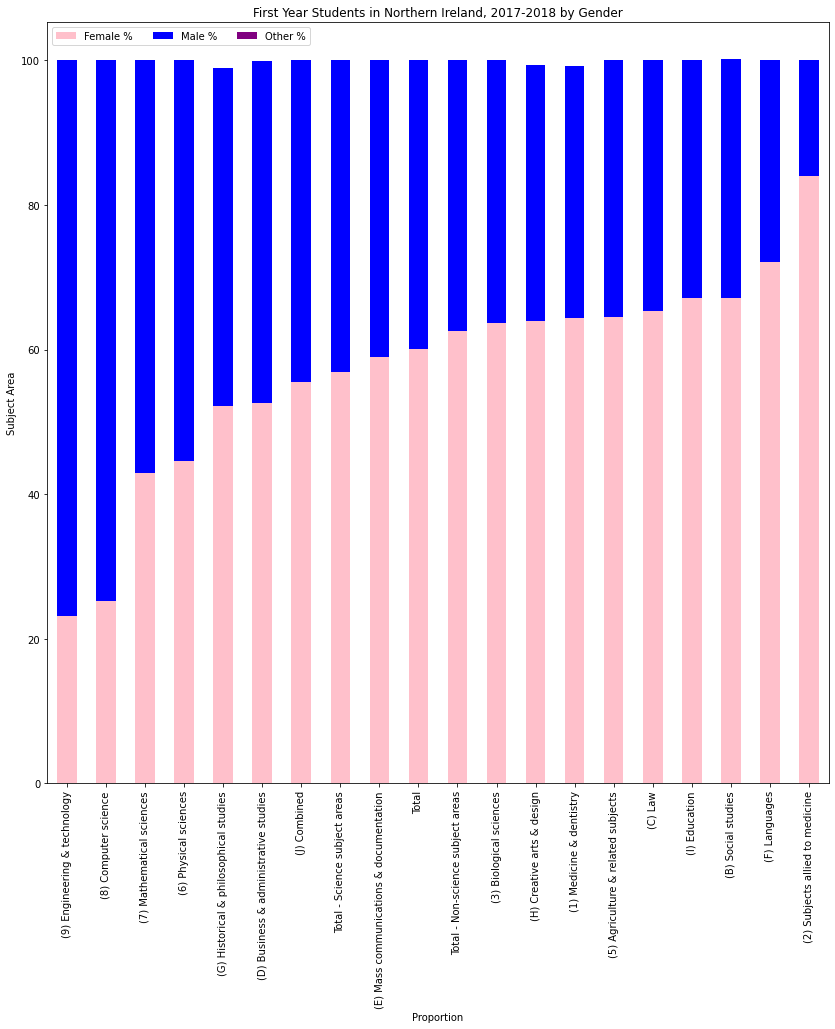

In [73]:
# Plot First Year Percentage of Male, Female, Other for 2017-2018
first_ni.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Northern Ireland, 2017-2018 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()